In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [42]:
train = pd.read_csv('./train.csv', encoding='cp949')
test = pd.read_csv('./test.csv', encoding='cp949')

train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039,331
1,2016-02-02,화,2601,50,173,319,0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867,560
2,2016-02-03,수,2601,56,180,111,0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017,573
3,2016-02-04,목,2601,104,220,355,0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978,525
4,2016-02-05,금,2601,278,181,34,0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925,330


In [43]:
train['일자'] = pd.to_datetime(train['일자'])
test['일자'] = pd.to_datetime(test['일자'])

train['년'] = train['일자'].dt.year
train['월'] = train['일자'].dt.month
train['일'] = train['일자'].dt.day
train['주'] = train['일자'].dt.week
train['요일'] = train['일자'].dt.weekday
train['식사가능자수'] = train['본사정원수']-(train['본사휴가자수']+train['본사출장자수']+train['현본사소속재택근무자수'])
# train['휴가비율'] = train['본사휴가자수']/train['본사정원수']
# train['출장비율'] = train['본사출장자수']/train['본사정원수']
# train['야근비율'] = train['본사시간외근무명령서승인건수']/train['식사가능자수']
# train['재택비율'] = train['현본사소속재택근무자수']/train['본사정원수']

test['년'] = test['일자'].dt.year
test['월'] = test['일자'].dt.month
test['일'] = test['일자'].dt.day
test['주'] = test['일자'].dt.week
test['요일'] = test['일자'].dt.weekday
test['식사가능자수'] = test['본사정원수']-(test['본사휴가자수']+test['본사출장자수']+test['현본사소속재택근무자수'])
# test['휴가비율'] = test['본사휴가자수']/test['본사정원수']
# test['출장비율'] = test['본사출장자수']/test['본사정원수']
# test['야근비율'] = test['본사시간외근무명령서승인건수']/test['식사가능자수']
# test['재택비율'] = test['현본사소속재택근무자수']/test['본사정원수']

In [44]:
import datetime

def get_week_no(date):
    firstday = date.replace(day=1)
    if firstday.weekday() == 6:
        origin = firstday
    elif firstday.weekday() < 3:
        origin = firstday - datetime.timedelta(days=firstday.weekday() + 1)
    else:
        origin = firstday + datetime.timedelta(days=6-firstday.weekday())
    
    if ((date - origin).days // 7 + 1) <1:
        return 2        
        
    return (date - origin).days // 7 + 1

In [45]:
week1 = pd.DataFrame(index=range(0,len(train)), columns=['주차'])
week1['주차'] = week1['주차'].fillna(0)

week2 = pd.DataFrame(index=range(0,len(test)), columns=['주차'])
week2['주차'] = week2['주차'].fillna(0)

for i in range(len(train)):
    week1['주차'][i] = get_week_no(train['일자'][i])

for i in range(len(test)):
    week2['주차'][i] = get_week_no(test['일자'][i])
    
train = pd.concat([train, week1], axis=1)
test = pd.concat([test, week2], axis=1)

In [46]:
import requests
from urllib import parse
# import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime

def getHoliday(year: int) -> pd.DataFrame:
    url = "http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService/getRestDeInfo"
    api_key_utf8 = "qu9mUBECqmbjV1RDmrqw%2FtW8i3%2BF52mw4W5EogF4Yz5227TfAhQsC3gz7hFxUbhBLgXXIN6prRQh5Oq2hUYF4A%3D%3D"
    api_key_decode = parse.unquote(api_key_utf8)

    params = {
        "ServiceKey": api_key_decode,
        "solYear": year,
        "numOfRows": 100
    }

    response = requests.get(url, params=params)
    xml = BeautifulSoup(response.text, "lxml")
    items = xml.find('items')
    item_list = []
    for item in items:
        item_dict = {
            "이름": item.find("datename").text.strip(),
            "날짜": datetime.strptime(item.find("locdate").text.strip(), '%Y%m%d')
        }
        item_list.append(item_dict)

    return pd.DataFrame(item_list)

In [47]:
red2016 = getHoliday(2016)
red2017 = getHoliday(2017)
red2018 = getHoliday(2018)
red2019 = getHoliday(2019)
red2020 = getHoliday(2020)
red2021 = getHoliday(2021)

redday = pd.concat([red2016, red2017, red2018, red2019, red2020, red2021], axis=0)
redday.reset_index(drop=True, inplace=True)
redday

,이름,날짜
0,신정,2016-01-01
1,설날,2016-02-07
2,설날,2016-02-08
3,설날,2016-02-09
4,대체공휴일,2016-02-10
...,...,...
98,추석,2021-09-21
99,추석,2021-09-22
100,개천절,2021-10-03
101,한글날,2021-10-09


In [48]:
df1 = pd.DataFrame(index=range(0,len(train)), columns=['공휴일전후'])
train = pd.concat([train, df1], axis=1)
train['공휴일전후'] = train['공휴일전후'].fillna(0)
train.reset_index(drop=True, inplace=True)

df2 = pd.DataFrame(index=range(0,len(test)), columns=['공휴일전후'])
test = pd.concat([test, df2], axis=1)
test['공휴일전후'] = test['공휴일전후'].fillna(0)
test.reset_index(drop=True, inplace=True)

In [49]:
# 공휴일 전, 후 변수
for i in range(len(train)):
    for j in range(len(redday)):
        diff = abs((redday['날짜'][j]-train['일자'][i]).days)                
        if train['공휴일전후'][i] == 0:
            if (diff == 0) | (diff == 1) :
                train['공휴일전후'][i] = 1
            else:
                train['공휴일전후'][i] = 0

for i in range(len(test)):
    for j in range(len(redday)):
        diff = abs((redday['날짜'][j]-test['일자'][i]).days)                
        if test['공휴일전후'][i] == 0:
            if (diff == 0) | (diff == 1) :
                test['공휴일전후'][i] = 1
            else:
                test['공휴일전후'][i] = 0

In [50]:
# df1 = pd.DataFrame(index=range(0,len(train)), columns=['공휴일전', '공휴일후'])
# train = pd.concat([train, df1], axis=1)
# train['공휴일전'] = train['공휴일전'].fillna(0)
# train['공휴일후'] = train['공휴일후'].fillna(0)
# train.reset_index(drop=True, inplace=True)

# df2 = pd.DataFrame(index=range(0,len(test)), columns=['공휴일전', '공휴일후'])
# test = pd.concat([test, df2], axis=1)
# test['공휴일전'] = test['공휴일전'].fillna(0)
# test['공휴일후'] = test['공휴일후'].fillna(0)
# test.reset_index(drop=True, inplace=True)

In [51]:
# # 공휴일 전, 후 변수
# for i in range(len(train)):
#     for j in range(len(redday)):
#         diff = (redday['날짜'][j]-train['일자'][i]).days                
#         if train['공휴일전'][i] == 0:
#             if (diff == 0) | (diff == 1) :
#                 train['공휴일전'][i] = 1
#             else:
#                 train['공휴일전'][i] = 0
#         if train['공휴일후'][i] == 0:
#             if (diff == 0) | (diff == -1) :
#                 train['공휴일후'][i] = 1
#             else:
#                 train['공휴일후'][i] = 0

# for i in range(len(test)):
#     for j in range(len(redday)):
#         diff = (redday['날짜'][j]-test['일자'][i]).days                
#         if test['공휴일전'][i] == 0:
#             if (diff == 0) | (diff == 1) :
#                 test['공휴일전'][i] = 1
#             else:
#                 test['공휴일전'][i] = 0
#         if test['공휴일후'][i] == 0:
#             if (diff == 0) | (diff == -1) :
#                 test['공휴일후'][i] = 1
#             else:
#                 test['공휴일후'][i] = 0

In [52]:
# 자기계발의 날
li=[]

# 2016/11-12 따로 처리
aa = train[(train['년']==2016) & (train['월']==11)]
tt = aa[(aa['주차']==aa['주차'].max()) & (aa['요일']==2)]['일자']
if tt.empty:
    li.append(aa[(aa['주차']==(aa['주차'].max()-1)) & (aa['요일']==2)]['일자'])
else:
    li.append(aa[(aa['주차']==aa['주차'].max()) & (aa['요일']==2)]['일자'])   

aa = train[(train['년']==2016) & (train['월']==12)]
tt = aa[(aa['주차']==aa['주차'].max()) & (aa['요일']==2)]['일자']
if tt.empty:
    li.append(aa[(aa['주차']==(aa['주차'].max()-1)) & (aa['요일']==2)]['일자'])
else:
    li.append(aa[(aa['주차']==aa['주차'].max()) & (aa['요일']==2)]['일자'])   

    
for i in range(2017,2020):
    for j in range(1,12):
        aa = train[(train['년']==i) & (train['월']==j)]
        tt = aa[(aa['주차']==aa['주차'].max()) & (aa['요일']==2)]['일자']
        if tt.empty:
            if aa[(aa['주차']==(aa['주차'].max()-1)) & (aa['요일']==2)]['일자'].empty:
                continue
            else:
                li.append(aa[(aa['주차']==(aa['주차'].max()-1)) & (aa['요일']==2)]['일자'])
        else:
            li.append(aa[(aa['주차']==aa['주차'].max()) & (aa['요일']==2)]['일자'])            

In [53]:
# 자기계발의 날
li1=[]

for j in range(1,12):
    aa = test[(test['년']==2021) & (test['월']==j)]
    tt = aa[(aa['주차']==aa['주차'].max()) & (aa['요일']==2)]['일자']
    if tt.empty:
        if aa[(aa['주차']==(aa['주차'].max()-1)) & (aa['요일']==2)]['일자'].empty:
            continue
        elif (aa['주차'].max()-1)>3:
            li1.append(aa[(aa['주차']==(aa['주차'].max()-1)) & (aa['요일']==2)]['일자'])
        else:
            continue
    else:
        li1.append(aa[(aa['주차']==aa['주차'].max()) & (aa['요일']==2)]['일자'])          

In [54]:
# df1 = pd.DataFrame(index=range(0,len(train)), columns=['자기계발의날'])
# train = pd.concat([train, df1], axis=1)
# train['자기계발의날'] = train['자기계발의날'].fillna(0)
# train.reset_index(drop=True, inplace=True)

# df2 = pd.DataFrame(index=range(0,len(test)), columns=['자기계발의날'])
# test = pd.concat([test, df2], axis=1)
# test['자기계발의날'] = test['자기계발의날'].fillna(0)
# test.reset_index(drop=True, inplace=True)

In [55]:
# for i in range(len(train)):
#     for j in range(len(li)):
#         if (train['일자'][i] == li[j]).bool():
#             train['자기계발의날'][i] = 1
            
# for i in range(len(test)):
#     for j in range(len(li1)):
#         if (test['일자'][i] == li1[j]).bool():
#             test['자기계발의날'][i] = 1

In [56]:
## 우선 메뉴 삭제
data1 = train.drop(['조식메뉴'], axis=1)
data2 = test.drop(['조식메뉴'], axis=1)
submission = pd.DataFrame(test['일자'])

In [57]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
요일,1205.0,2.006639,1.415372,0.0,1.0,2.0,3.0,4.0
본사정원수,1205.0,2807.815768,171.264404,2601.0,2645.0,2760.0,2962.0,3305.0
본사휴가자수,1205.0,157.913693,144.190572,23.0,71.0,105.0,185.0,1224.0
본사출장자수,1205.0,241.142739,43.532298,41.0,217.0,245.0,272.0,378.0
본사시간외근무명령서승인건수,1205.0,274.117012,246.239651,0.0,4.0,299.0,452.0,1044.0
현본사소속재택근무자수,1205.0,43.506224,109.937400,0.0,0.0,0.0,0.0,533.0
중식계,1205.0,890.334440,209.505057,296.0,758.0,879.0,1032.0,1459.0
석식계,1205.0,461.772614,139.179202,0.0,406.0,483.0,545.0,905.0
년,1205.0,2018.052282,1.433958,2016.0,2017.0,2018.0,2019.0,2021.0
월,1205.0,6.512033,3.453906,1.0,4.0,7.0,9.0,12.0


In [58]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
요일,50.0,2.04,1.399125,0.0,1.00,2.0,3.00,4.0
본사정원수,50.0,2956.84,24.968846,2924.0,2924.00,2974.0,2975.00,2983.0
본사휴가자수,50.0,129.52,84.065873,50.0,78.25,95.0,137.50,489.0
본사출장자수,50.0,209.22,39.454593,131.0,176.50,202.5,245.25,279.0
본사시간외근무명령서승인건수,50.0,380.14,346.564304,0.0,1.00,465.5,681.00,1003.0
현본사소속재택근무자수,50.0,298.14,52.058056,179.0,257.25,300.0,333.25,413.0
년,50.0,2021.00,0.000000,2021.0,2021.00,2021.0,2021.00,2021.0
월,50.0,2.66,0.798212,1.0,2.00,3.0,3.00,4.0
일,50.0,14.56,9.335384,1.0,6.25,15.0,23.00,31.0
주,50.0,9.32,3.119655,4.0,7.00,9.5,12.00,14.0


In [19]:
# li1=['요일', '년', '월', '일', '주', '공휴일전후', '중식계', '석식계']
# li2=['요일', '년', '월', '일', '주', '공휴일전후']

# label1 = data1[li1]
# label2 = data2[li2]

# label1_drop = data1[data1.columns.difference(li1)]
# label2_drop = data2[data2.columns.difference(li2)]

In [20]:
# from sklearn.preprocessing import RobustScaler

# robustScaler = RobustScaler()
# robustScaler.fit(label1_drop)
# label1_drop_robustScaled = robustScaler.transform(label1_drop)

# robustScaler.fit(label2_drop)
# label2_drop_robustScaled = robustScaler.transform(label2_drop)

# ro_data1 = pd.concat([label1, pd.DataFrame(label1_drop_robustScaled, columns=label1_drop.columns)], axis=1)
# ro_data2 = pd.concat([label2, pd.DataFrame(label2_drop_robustScaled, columns=label2_drop.columns)], axis=1)

# ro_data1.head()

In [21]:
# x = ro_data1.drop(['중식계', '석식계'], axis=1)
# y1 = ro_data1['중식계']  ## 중식계
# y2 = ro_data1['석식계']  #석식계

---

In [59]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# HYPER PARAMETERS

class CFG:
    emb_dim = 200

args = CFG

In [60]:
# Basic text preprocessing

def split_process(x, q):
    x_ = []
    x = x.split(' ')
    for i in x:
        if (i == np.nan):
            continue
        if '(' in i and ':' in i and ')' in i:
            continue
        if '/' in i:
            x_.extend(i.split('/'))
        else:
            x_.append(i)
    x_ = list(set(x_))
    x_.remove('')
    return x_

In [61]:
df = pd.concat([data1.drop(['중식계', '석식계'],axis=1), data2])
df.reset_index(drop=True, inplace=True)
li3 = li+li1

for i in range(len(df)):
    for j in range(len(li3)):
        if (df['일자'][i] == li3[j]).bool():
            df['석식메뉴'][i] = '/'

In [62]:
# Get all combinations for training w2v (train + test)

food_combinations = []
for i in ['중식메뉴', '석식메뉴']:
    food_combinations += df[i].apply(lambda x: split_process(x, i)).to_list()

In [63]:
# Train or load w2v model

TRAIN_W2V = True
try:
    model = Word2Vec.load('food_embedding_subpercent_lastwens.model')
    print("Model loaded")
except:
    if TRAIN_W2V:
        print("Training w2v")
        model = Word2Vec(sentences=food_combinations, vector_size=args.emb_dim, window=7, min_count=0, workers=4, sg=0, epochs=5000)
        model.save('food_embedding_subpercent_lastwens.model')
    else:
        print("Model loading failed. Do not train.")

Training w2v


In [109]:
# # w2v demo - baseline model
# model.wv.most_similar('된장찌개')

In [110]:
# # w2v demo - baseline에서 변수 좀 줄인 거
# model.wv.most_similar('된장찌개')

In [111]:
# # w2v demo - baseline에서 변수 좀 줄인 거 + 더 줄인거
# model.wv.most_similar('된장찌개')

In [22]:
# # w2v demo - baseline에서 변수 엄청 추가(공휴일 전후, 자기계발)
# model.wv.most_similar('된장찌개')

[('차돌박이찌개', 0.577858030796051),
 ('순두부찌개', 0.5516394972801208),
 ('근대국', 0.5477926135063171),
 ('아욱국', 0.5161869525909424),
 ('쇠고기미역국', 0.500685453414917),
 ('어묵국', 0.4936211109161377),
 ('콩비지찌개', 0.46944424510002136),
 ('버섯들깨탕', 0.46661829948425293),
 ('매운소고기국', 0.4634683430194855),
 ('조랭이떡미역국', 0.46231523156166077)]

In [64]:
# w2v demo - baseline에서 비율변수 제거 + 자기계발 석식메뉴 이상한 값 삭제
model.wv.most_similar('된장찌개')

[('차돌박이찌개', 0.566500186920166),
 ('쇠고기미역국', 0.5165339112281799),
 ('아욱국', 0.50705885887146),
 ('순두부찌개', 0.48504409193992615),
 ('근대국', 0.4715474545955658),
 ('매운소고기국', 0.46941742300987244),
 ('동태탕', 0.46431440114974976),
 ('순두부탕', 0.45794546604156494),
 ('냉이된장찌개', 0.449785441160202),
 ('닭개장', 0.4451124668121338)]

In [65]:
def get_food_embedding(x):
    x_ = []
    x = x.split(' ')
    for i in x:
        if '(' in i and ':' in i and ')' in i:
            continue
        if '/' in i:
            x_.extend(i.split('/'))
        else:
            x_.append(i)
    x_ = list(set(x_))
    x_.remove('')
    vec_ = np.zeros(args.emb_dim)
    for i in x_:
        vec = model.wv.get_vector(i)
        vec_ += vec
    vec_ /= len(x_)
    return vec_

In [66]:
for i in range(len(data1)):
    for j in range(len(li3)):
        if (data1['일자'][i] == li3[j]).bool():
            data1['석식메뉴'][i] = '/'
            
for i in range(len(data2)):
    for j in range(len(li3)):
        if (data2['일자'][i] == li3[j]).bool():
            data2['석식메뉴'][i] = '/'

In [67]:
data1['중식메뉴_embedding'] = data1['중식메뉴'].apply(lambda x: get_food_embedding(x))
data1['석식메뉴_embedding'] = data1['석식메뉴'].apply(lambda x: get_food_embedding(x))

data2['중식메뉴_embedding'] = data2['중식메뉴'].apply(lambda x: get_food_embedding(x))
data2['석식메뉴_embedding'] = data2['석식메뉴'].apply(lambda x: get_food_embedding(x))

In [68]:
data1 = data1.drop(['중식메뉴','석식메뉴'], axis=1)
data2 = data2.drop(['중식메뉴','석식메뉴'], axis=1)

---

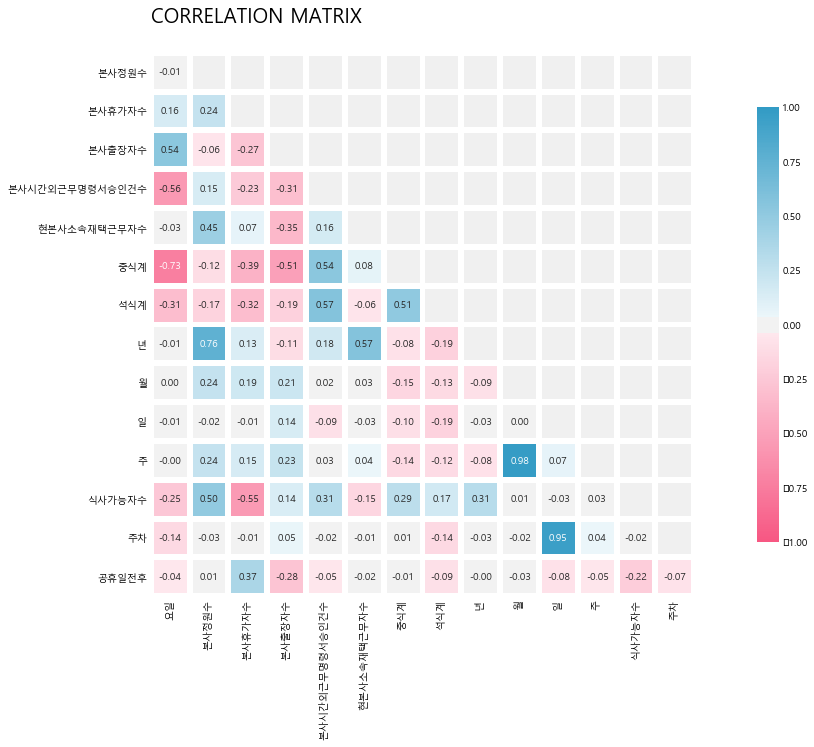

In [74]:
# li2=['요일', '년', '월', '일', '주', '공휴일전후']
# label2_drop = data1[data1.columns.difference(li2)]

# fig, ax = plt.subplots(figsize=(20, 20))
plt.figure()
plt.rcParams['figure.figsize'] = [20, 10] # [width, height]
plt.rcParams['font.family'] = 'Malgun Gothic'
df_corr = data1.corr()

# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)

# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)

# title
title = 'CORRELATION MATRIX\n'
plt.title(title, loc='left', fontsize=20)
plt.show()

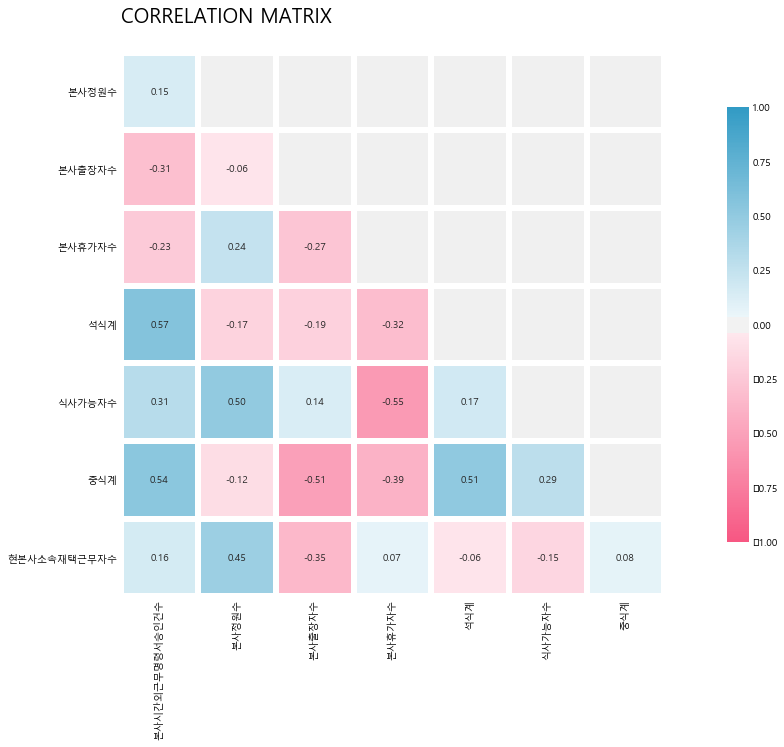

In [75]:
li2=['요일', '년', '월', '일', '주', '주차', '공휴일전후']
label2_drop = data1[data1.columns.difference(li2)]

# fig, ax = plt.subplots(figsize=(20, 20))
plt.figure()
plt.rcParams['figure.figsize'] = [20, 10] # [width, height]
plt.rcParams['font.family'] = 'Malgun Gothic'
df_corr = label2_drop.corr()

# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)

# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)

# title
title = 'CORRELATION MATRIX\n'
plt.title(title, loc='left', fontsize=20)
plt.show()

---

In [76]:
x = data1.drop(['중식계', '석식계'], axis=1)
y1 = data1['중식계']  ## 중식계
y2 = data1['석식계']  #석식계

In [89]:
# train
X_common1 = x.iloc[:, :14]
X_common1.drop('일자', axis=1, inplace=True)
emb_arr_lunch1 = np.array(x.iloc[:, 14].to_numpy().tolist()) # Ver 2
emb_arr_dinner1 = np.array(x.iloc[:, 15].to_numpy().tolist()) # Ver 2

X_train_lunch = np.concatenate((X_common1.to_numpy(), emb_arr_lunch1), axis=1)
X_train_dinner = np.concatenate((X_common1.to_numpy(), emb_arr_dinner1), axis=1)

In [90]:
# test
X_common2 = data2.iloc[:, :14]
X_common2.drop('일자', axis=1, inplace=True)
emb_arr_lunch2 = np.array(data2.iloc[:, 14].to_numpy().tolist()) # Ver 2
emb_arr_dinner2 = np.array(data2.iloc[:, 15].to_numpy().tolist()) # Ver 2

X_test_lunch = np.concatenate((X_common2.to_numpy(), emb_arr_lunch2), axis=1)
X_test_dinner = np.concatenate((X_common2.to_numpy(), emb_arr_dinner2), axis=1)

---

In [82]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

#alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df=pd.DataFrame()
    if verbose:
        print('######',model_name,'######')
    for param in params:
        if model_name=='Ridge':
            model=Ridge(alpha=param)
        elif model_name=='Lasso':
            model=Lasso(alpha=param)
        neg_mse_scores=cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일 때 5-fold 세트의 평균 RMSE:{1:.3f}'.format(param, avg_rmse))
        
        model.fit(X_data_n, y_target_n)
        
        if return_coeff:
            coeff=pd.Series(data=model.coef_, index=X_data_n.columns)
            colname='alpha:'+str(param)
            coeff_df[colname]=coeff
    return coeff_df

In [91]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_common1, y_target_n=y1)

###### Lasso ######
alpha 0.07일 때 5-fold 세트의 평균 RMSE:1088.525
alpha 0.1일 때 5-fold 세트의 평균 RMSE:1079.485
alpha 0.5일 때 5-fold 세트의 평균 RMSE:958.965
alpha 1일 때 5-fold 세트의 평균 RMSE:808.269
alpha 3일 때 5-fold 세트의 평균 RMSE:188.950


In [92]:
sort_column='alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
공휴일전후,19.145574,18.499073,9.879052,0.000000,0.000000
주차,13.727633,13.459682,9.886994,5.441203,0.000000
주,6.095319,6.066632,5.684147,5.209295,3.447139
식사가능자수,0.100317,0.099752,0.092224,0.082799,0.046927
본사시간외근무명령서승인건수,0.095800,0.095840,0.096375,0.097065,0.100585
현본사소속재택근무자수,0.091851,0.090816,0.077016,0.059983,0.000000
본사정원수,-0.052637,-0.052514,-0.050873,-0.048725,-0.037648
본사휴가자수,-0.452612,-0.453042,-0.458769,-0.466428,-0.519931
본사출장자수,-1.614141,-1.616782,-1.651995,-1.694852,-1.816272
일,-3.619211,-3.578869,-3.040964,-2.370344,-1.323835


In [93]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_common1, y_target_n=y2)

###### Lasso ######
alpha 0.07일 때 5-fold 세트의 평균 RMSE:433.993
alpha 0.1일 때 5-fold 세트의 평균 RMSE:424.114
alpha 0.5일 때 5-fold 세트의 평균 RMSE:292.539
alpha 1일 때 5-fold 세트의 평균 RMSE:141.128
alpha 3일 때 5-fold 세트의 평균 RMSE:103.581


In [94]:
sort_column='alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
요일,6.626647,6.624768,6.601967,6.564111,4.799789
주,2.620572,2.596575,2.276851,1.877155,0.141117
본사시간외근무명령서승인건수,0.339559,0.339496,0.338649,0.337591,0.332649
본사정원수,0.124159,0.120753,0.084475,0.074062,0.049973
현본사소속재택근무자수,-0.021295,-0.018201,0.013713,0.018738,0.011849
식사가능자수,-0.040814,-0.037700,-0.005382,0.000012,0.000007
본사휴가자수,-0.164761,-0.162111,-0.135970,-0.138211,-0.143768
본사출장자수,-0.269648,-0.265527,-0.219965,-0.197819,-0.178143
일,-1.522589,-1.548117,-1.888499,-2.306489,-2.097682
주차,-6.622672,-6.407274,-3.534817,-0.000000,-0.000000


---

In [95]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_train_lunch, y1, test_size=0.3, random_state=1)  #점심
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_train_dinner, y2, test_size=0.3, random_state=1)  #저녁

In [96]:
print("lunch : ", X_train1.shape, X_test1.shape, Y_train1.shape, Y_test1.shape)
print("dinner : ", X_train2.shape, X_test2.shape, Y_train2.shape, Y_test2.shape)

lunch :  (843, 213) (362, 213) (843,) (362,)
dinner :  (843, 213) (362, 213) (843,) (362,)


---

### RandomForest  
#### MAE : 104.33866 (scaler X)
#### MAE : 146.8873333333	(scaler O)

In [32]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn import metrics
# from sklearn.metrics import*

# Rf1 = RandomForestRegressor(n_jobs=-1, random_state=42)
# Rf1.fit(X_train1, Y_train1)
# y_pred1 = Rf1.predict(X_test1.values)
# print(Rf1.score(X_test1, Y_test1))


# Rf2 = RandomForestRegressor(n_jobs=-1, random_state=42)
# Rf2.fit(X_train2, Y_train2)
# y_pred2 = Rf2.predict(X_test2.values)
# print(Rf2.score(X_test2, Y_test2))

In [33]:
# # MAE
# from sklearn.metrics import mean_absolute_error

# print(mean_absolute_error(Y_test1, y_pred1))
# print(mean_absolute_error(Y_test2, y_pred2))

In [34]:
# y_pred_test1 = pd.DataFrame(Rf1.predict(ro_data2.values))
# y_pred_test2 = pd.DataFrame(Rf2.predict(ro_data2.values))

In [35]:
# y_pred_test1.columns = ['중식계']
# y_pred_test2.columns = ['석식계']

# submission = pd.concat([submission, y_pred_test1, y_pred_test2], axis=1)
# submission

In [36]:
# submission.to_csv('./submission.csv', index=False)

---
### XGBoost
#### MAE : 136.617061 (sclaer O)
#### MAE : 97.84234 (scaler X)
#### MAE : 97.6750413333 (scaler X, 주차 변수 추가)
#### MAE : 96.81527(변수 수정)
#### MAE : 89.2011 (word2vec)
#### MAE : 92.694133 (변수 좀 줄임)
#### MAE : 93.6080943333 (변수 더 줄임)

In [97]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

params = {
    'learning_rate': [0.0, 0.1, 0.09, 0.089, 0.08],
    'boosting_type': ['gbtree', 'gblinear', 'dart']
}

lunch_r = XGBRegressor(objective='reg:squarederror')
dinner_r = XGBRegressor(objective='reg:squarederror')

lunch_model = GridSearchCV(lunch_r, params, scoring='neg_mean_absolute_error')
dinner_model = GridSearchCV(dinner_r, params, scoring='neg_mean_absolute_error')

In [98]:
lunch_model.fit(X_train1, Y_train1)
print(lunch_model.best_score_, lunch_model.best_params_)
lunch_model = lunch_model.best_estimator_
y_pred1 = lunch_model.predict(X_test1)
print(lunch_model.score(X_test1, Y_test1))

dinner_model.fit(X_train2, Y_train2)
print(dinner_model.best_score_, dinner_model.best_params_)
dinner_model = dinner_model.best_estimator_
y_pred2 = dinner_model.predict(X_test2)
print(dinner_model.score(X_test2, Y_test2))

-77.63610154380594 {'boosting_type': 'gbtree', 'learning_rate': 0.09}
0.8169904790516832
-55.46956786161478 {'boosting_type': 'gbtree', 'learning_rate': 0.089}
0.772979965927271


In [99]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(Y_test1, y_pred1))
print(mean_absolute_error(Y_test2, y_pred2))

69.17726227986878
48.236461792202945


In [100]:
y_pred_test1 = pd.DataFrame(lunch_model.predict(X_test_lunch))
y_pred_test2 = pd.DataFrame(dinner_model.predict(X_test_dinner))

In [101]:
y_pred_test1.columns = ['중식계']
y_pred_test2.columns = ['석식계']

submission = pd.concat([submission, y_pred_test1, y_pred_test2], axis=1)
submission

,일자,중식계,석식계
0,2021-01-27,979.798401,-9.336122
1,2021-01-28,935.769348,440.775391
2,2021-01-29,663.186829,269.344391
3,2021-02-01,1225.579590,481.786865
4,2021-02-02,1025.926880,514.721008
5,2021-02-03,1002.668701,357.393127
6,2021-02-04,976.723511,457.249725
7,2021-02-05,683.676819,235.139023
8,2021-02-08,1220.983521,612.803894
9,2021-02-09,1070.316895,540.139038


In [102]:
submission.to_csv('./submission.csv', index=False)

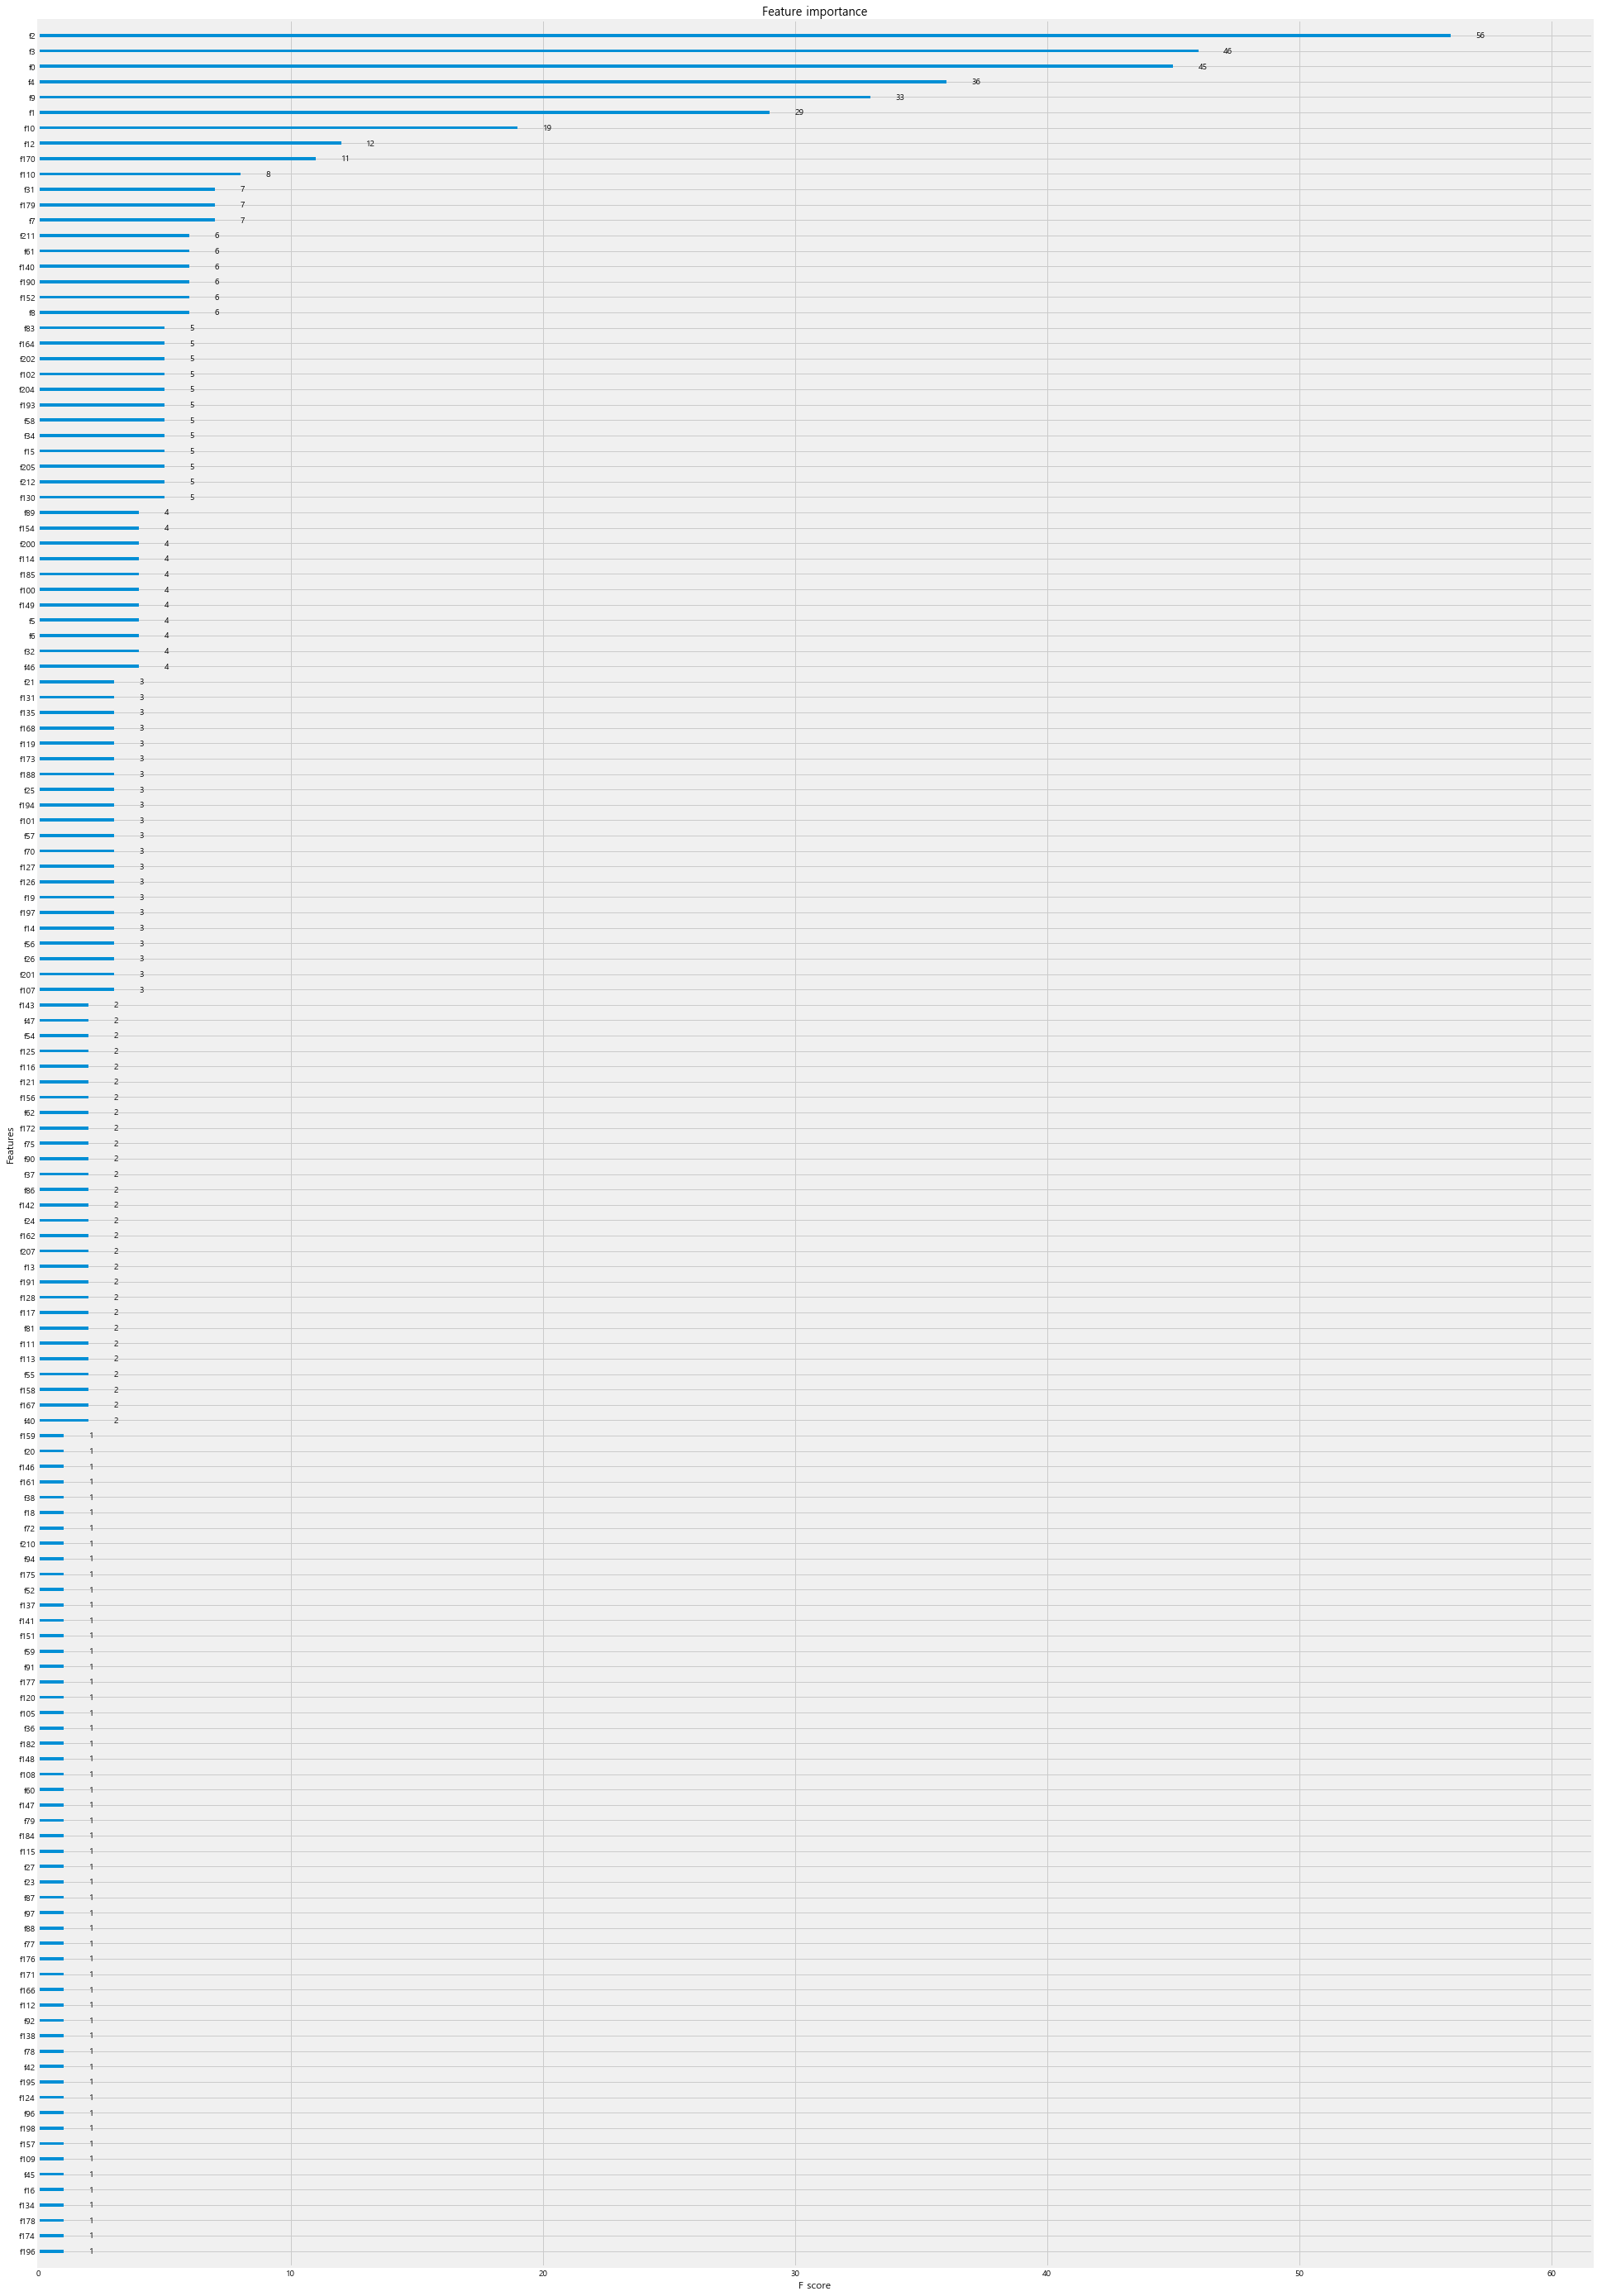

In [103]:
from xgboost import plot_importance
from matplotlib import pyplot

# plot feature importance
plt.rcParams["figure.figsize"] = (30, 50)
plot_importance(lunch_model)
pyplot.show()

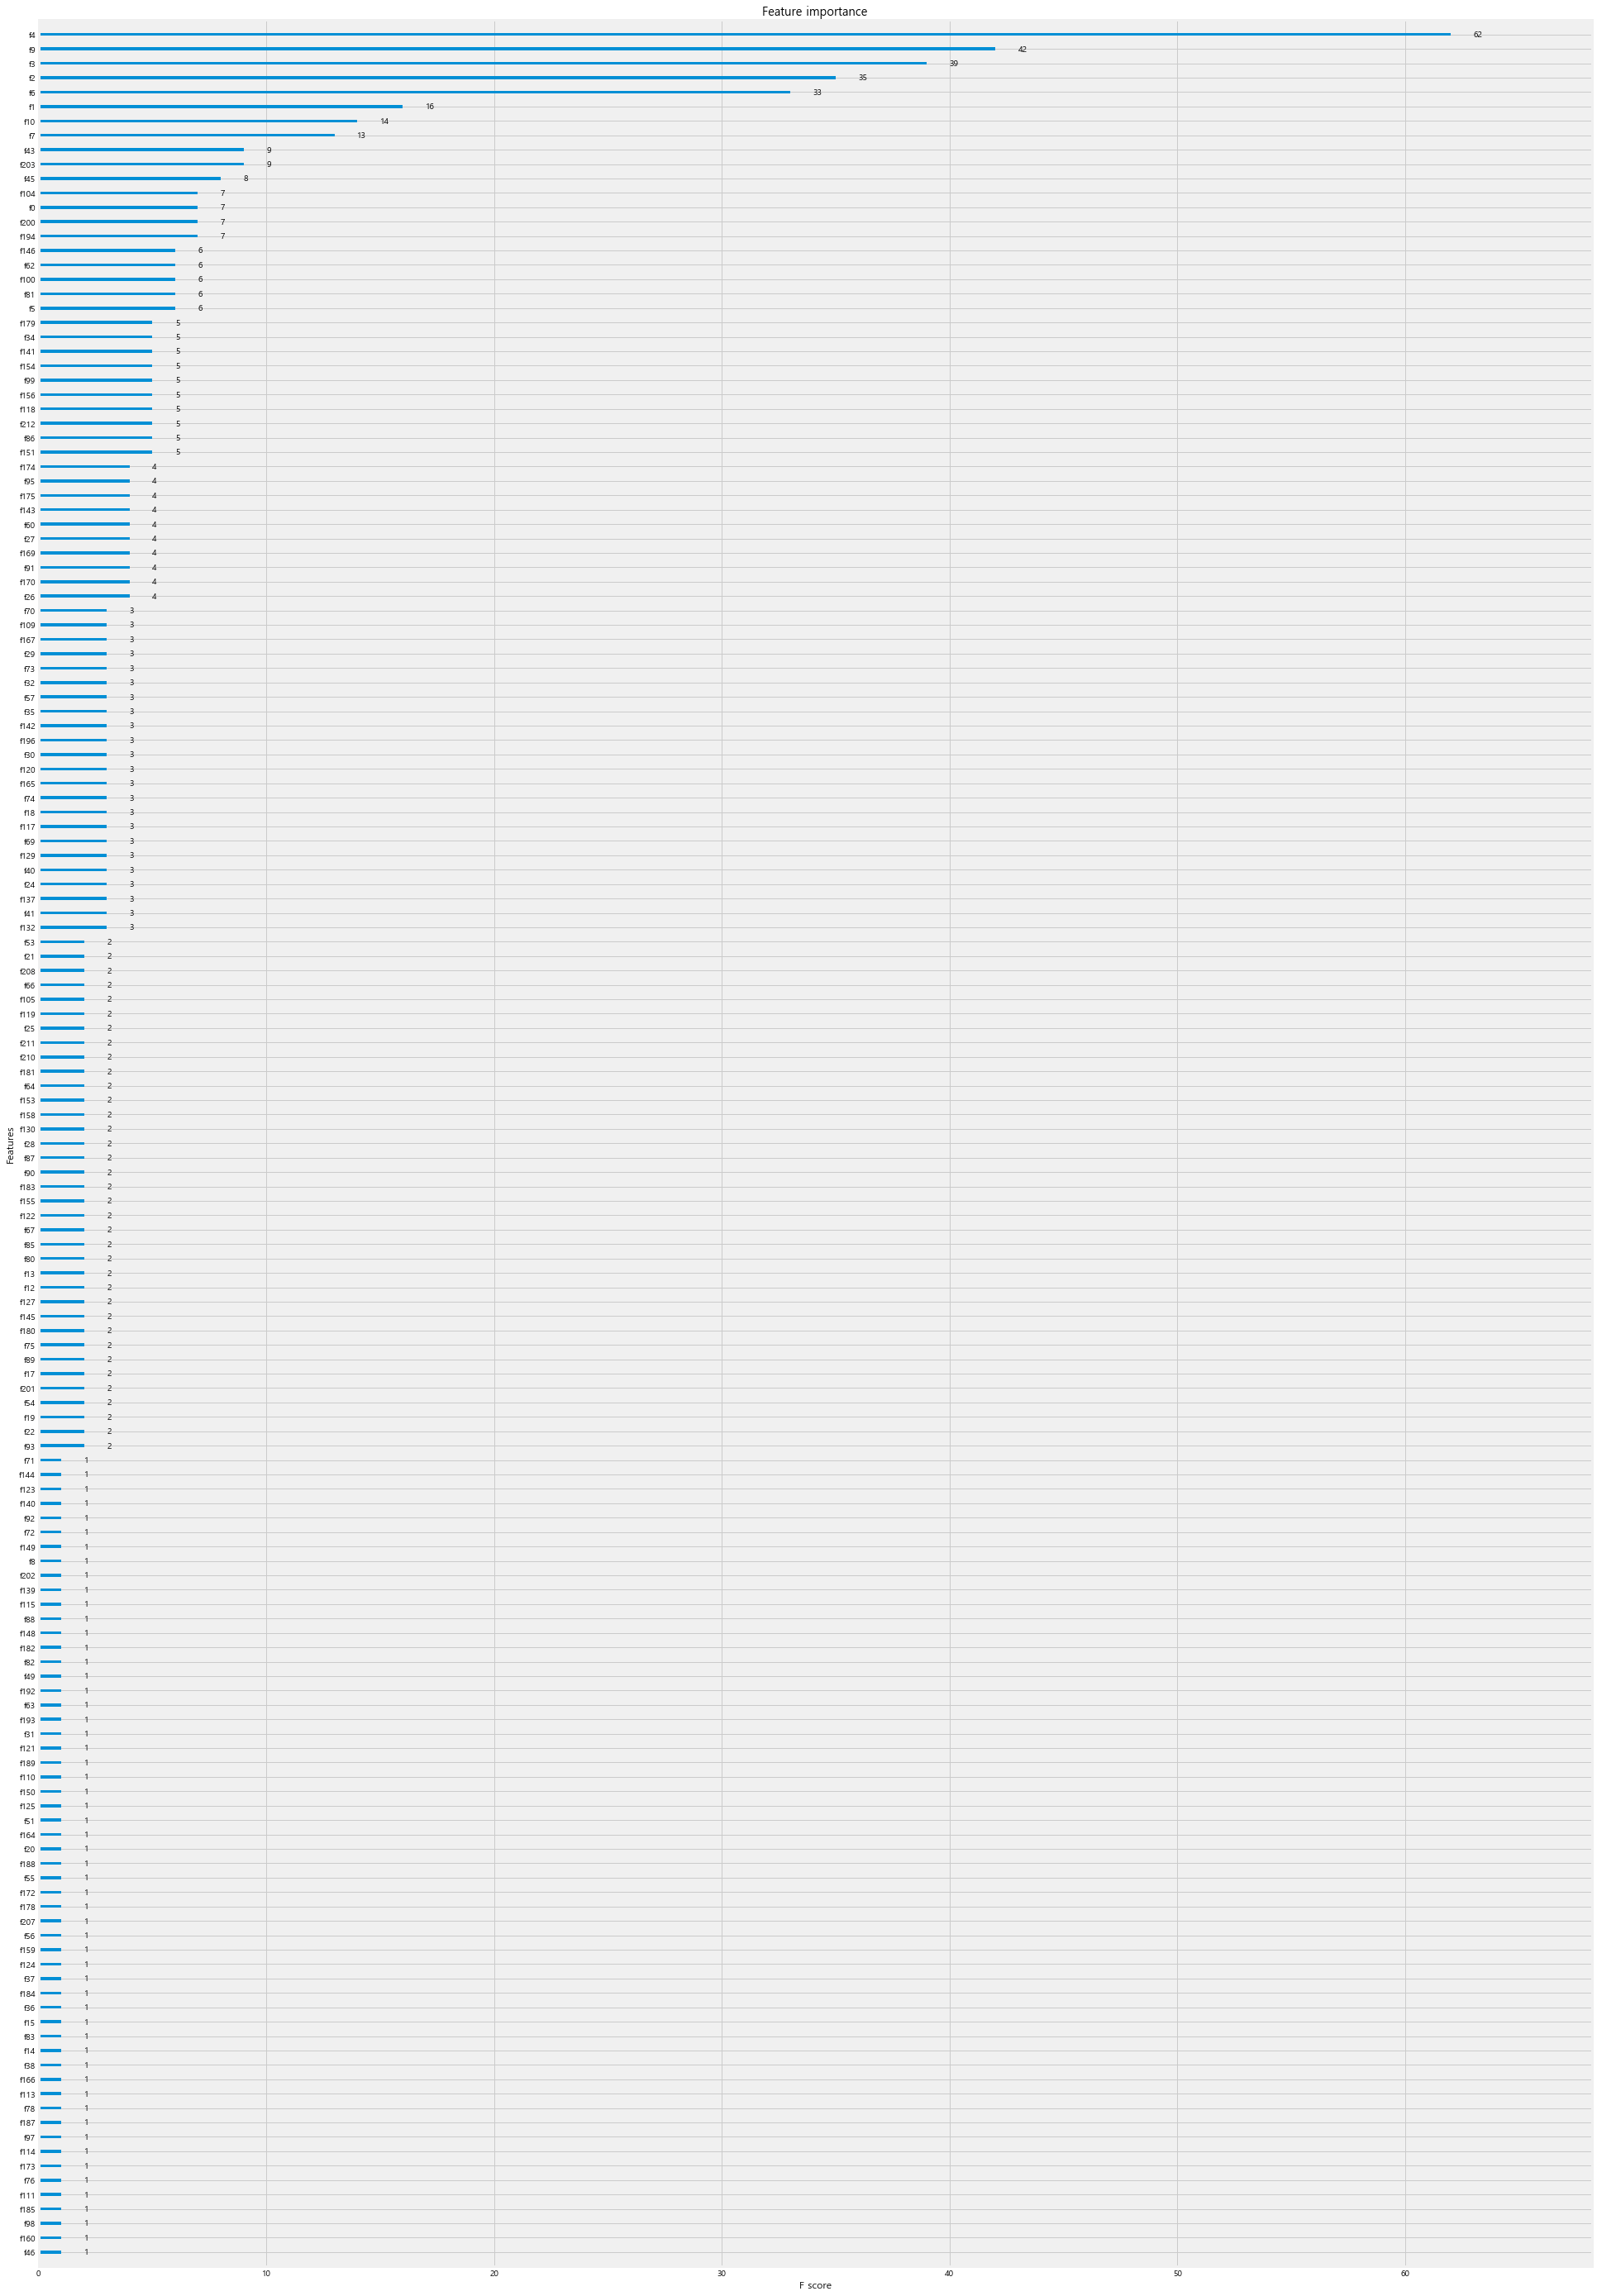

In [104]:
# plot feature importance
plot_importance(dinner_model)
pyplot.show()

---
### LGBM
#### MAE  :102.3943486784	

In [45]:
# from lightgbm import LGBMRegressor

# params = {
#     'learning_rate': [0.0, 0.1, 0.09, 0.089, 0.08],
#     'n_estimators':[500,700,800],
#     'reg_lambda':[0.3, 0.5, 0.7], 
#     'reg_alpha':[0.3, 0.5, 0.7]
# }

# lunch_r = LGBMRegressor()
# dinner_r = LGBMRegressor()

# lunch_model = GridSearchCV(lunch_r, params, scoring='neg_mean_absolute_error')
# dinner_model = GridSearchCV(dinner_r, params, scoring='neg_mean_absolute_error')

In [46]:
# lunch_model.fit(X_train1, Y_train1)
# print(lunch_model.best_score_, lunch_model.best_params_)
# lunch_model = lunch_model.best_estimator_
# y_pred1 = lunch_model.predict(X_test1)
# print(lunch_model.score(X_test1, Y_test1))


# dinner_model.fit(X_train2, Y_train2)
# print(dinner_model.best_score_, dinner_model.best_params_)
# dinner_model = dinner_model.best_estimator_
# y_pred2 = dinner_model.predict(X_test2)
# print(dinner_model.score(X_test2, Y_test2))

In [47]:
# print(mean_absolute_error(Y_test1, y_pred1))
# print(mean_absolute_error(Y_test2, y_pred2))

In [48]:
# y_pred_test1 = pd.DataFrame(lunch_model.predict(data2))
# y_pred_test2 = pd.DataFrame(dinner_model.predict(data2))

In [49]:
# y_pred_test1.columns = ['중식계']
# y_pred_test2.columns = ['석식계']

# submission = pd.concat([submission, y_pred_test1, y_pred_test2], axis=1)
# submission

In [50]:
# submission.to_csv('./submission.csv', index=False)